<a href="https://colab.research.google.com/github/Liwenting7778/news_title_classification/blob/main/news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import os
import jieba
import re

stopwords = [i.strip() for i in open('./data/cn_stop_words.txt',"r", encoding="utf-8").readlines()]

def pretty_cut(sentence):
    cut_list = jieba.lcut(''.join(re.findall('[\u4e00-\u9fa5]', sentence)), cut_all=True)
    for i in range(len(cut_list) - 1, -1, -1):
        if cut_list[i] in stopwords:
            del cut_list[i]
    return cut_list

f = open ("./data/toutiao_cat_data.txt", "r", encoding="utf-8")
lines = f.readlines()
f.close()
with open(os.path.join("./data/news.csv"), "w", encoding="utf-8", newline='') as g:
    writer = csv.writer(g)
    writer.writerow(["label", "news"])
    for line in lines:
        x = line.strip(" ")
        x = line.strip("\n")
        y = x.split("_!_")
        z = " ".join(y)
        cut_y = " ".join(pretty_cut(z))
        writer.writerow([y[2],cut_y])


In [1]:
#加载google的云端硬盘
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news1.csv', delimiter=",",names=['label','news'])#将逗号分隔值（csv）文件读取到DataFrame中
print("数据总量: %d ." % len(df))
df.sample(10)#对数据集进行抽样查看

数据总量: 382689 .


,label,news
18328,news_house,轻 奢 生活 百花 启幕 碧桂园 桂园 百花 里 产品 发布 发布会 璀璨 绽放 清镇 碧桂...
242156,news_travel,倒计 倒计时 计时 天 襄阳 公里 一级 路标 标准 西三环 三环 环线 即将 开建 牛 首...
177382,news_finance,有没有 没有 些小 小众 质量 品牌
369178,news_entertainment,应 采 怀 时 接地 地气 霍思燕 肚子 更 可能 当年 王菲 小时 时代 怀孕 霍思燕 身...
88378,news_edu,宝宝 念 小学 二年 二年级 年级 成绩 差 爱 学习 办法 提高 学习 兴趣
162753,news_edu,九江 职 院 第八 第八届 八届 全国 国大 大学 大学生 学生 生机 机械 创新 新设 设...
192158,news_sports,克服 习惯 习惯性 惯性 崴 脚
111159,news_finance,希腊 房子 快 买光 传言 究竟 竟是 真是 真是假 中远 集团 希腊 经济 比雷埃夫斯 夫...
338168,news_finance,岁 股市 女 奇才 豪言 研 股市 尾盘 买入 入法 半年 赚 千万 收藏 尾盘 选 股 超...
258235,news_finance,龙头 特 停 卡位 龙头 恒瑞 恒瑞医药 医药 新 题材 贵州 复星 医药 新 医药


In [3]:
print("在 labek 列中总共有 %d 个空值." % df['label'].isnull().sum())#查看label列的空值
print("在 news 列中总共有 %d 个空值." % df['news'].isnull().sum())
df[df.isnull().values==True]#isnull返回一个布尔数组
df = df[pd.notnull(df['news'])]#保留非null的news


在 labek 列中总共有 0 个空值.
在 news 列中总共有 52 个空值.


In [4]:
d = {'label':df['label'].value_counts().index, 'count': df['label'].value_counts()}#使用字典方法创建dataframe
df_label = pd.DataFrame(data=d).reset_index(drop=True)#数据清洗时，会将带空值的行删除，此时DataFrame或Series类型的数据不再是连续的索引，可以使用reset_index()重置索引。
print(df_label)


                 label  count
0            news_tech  41531
1   news_entertainment  39395
2          news_sports  37566
3             news_car  35784
4            news_game  29299
5         news_culture  28031
6         news_finance  27085
7             news_edu  27025
8           news_world  26909
9        news_military  24983
10         news_travel  21422
11    news_agriculture  19321
12          news_house  17672
13          news_story   6273
14               stock    340
15               label      1


<Figure size 432x288 with 0 Axes>

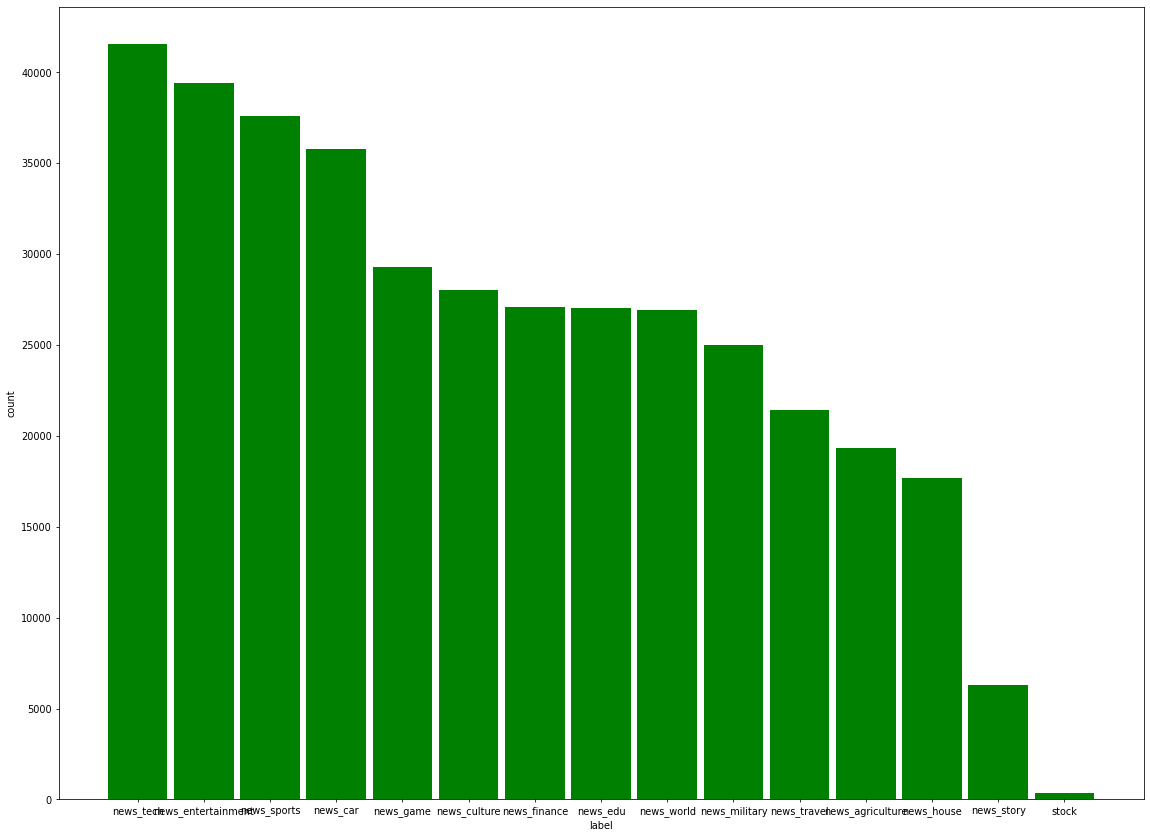

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
 
label = [i for i in df_label["label"]]
count = [int(i) for i in df_label["count"]]  
labels = label[0:-1]
count = count[0:-1]
fig = plt.figure()
plt.figure(figsize=(20,15),dpi=70)
plt.bar(labels,count,0.9,color="green")
plt.xlabel("label")
plt.ylabel("count")
plt.show() 


In [6]:
df['label_id'] = df['label'].factorize()[0]
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id').reset_index(drop=True)
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)
print(df.sample(10))


                   label                                               news  \
320566  news_agriculture  农村 村俗 俗语 离家 千里 勿 食 枸杞 到底 啥意思 意思 想 歪 中国 中国民俗 国民...   
223585     news_military                                       美国 退出 联合 联合国   
380729     news_military                 以色列 现在 挂出 免战 免战牌 声明 无意 升级 战争 对此 看待   
332714      news_culture                                        上联 一夜 春风 下联   
158507       news_travel  福建 小村 村庄 千年 年来 蚊子 生存 淳朴 民俗 民俗风情 风情 人流 流连 流连忘返 ...   
182673        news_house  沅江 江畔 崛起 一座 未来 之城 常德 共生 生长 中建 生态 智慧 城 沅江 常德 常德...   
204752        news_house                          咸阳 彬县 新区 房价 现在 基本 钱 会上 上涨   
312063         news_tech  微 信 小程 程序 裂变 状态 抢占 亿万 市场 程序 亚洲 亚洲一号 一号 微 信 无人 ...   
350784          news_edu                                      口中 老师 究竟 竟是 指   
27159          news_tech  小米 上市 估值 超 百度 雷 军 穿越 互联 互联网 联网 黑暗 森林 黑暗 森林 滴滴 ...   

        label_id  
320566        12  
223585         9  
380729         9  
332714         1  
158507        10  
182673         5

In [8]:
from keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 50000 # 设置最频繁使用的50000个词
MAX_SEQUENCE_LENGTH = 250  # 每条cut_news最大的长度
EMBEDDING_DIM = 100 # 设置Embeddingceng层的维度
#num_words: 保留的最大词数，根据词频计算，保留前num_word - 1个
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['news'].values)
word_index = tokenizer.word_index
print('共有 %s 个不相同的词语.' % len(word_index))

from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['news'].values)
#经过上一步操作后，X为整数构成的两层嵌套list
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#经过上步操作后，此时X变成了numpy.ndarray
#多类标签的onehot展开
Y = pd.get_dummies(df['label_id']).values

from sklearn.model_selection import train_test_split
#拆分训练集和测试集，X为被划分样本的特征集，Y为被划分样本的标签
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))#dropout会随机独立地将部分元素置零，而SpatialDropout1D会随机地对某个特定的纬度全部置零
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(16, activation='softmax'))#输出层包含15个分类的全连接层，激活函数设置为softmax
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


共有 144646 个不相同的词语.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64 #指定梯度下降时每个batch包含的样本数
#callbacks（list），其中元素是keras.callbacks.Callback的对象。这个list的回调函数将在训练过程中的适当时机被调用
#validation_split指定训练集中百分之十的数据作为验证集
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

model.save(r'./model.h5')#保存模型


Epoch 1/5
2382/4843 [=============>................] - ETA: 30:51 - loss: 0.6994 - accuracy: 0.7995

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [ ]:
#预测两条新闻
def Predict(text):
    txt = pretty_cut(text)
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    label_id= pred.argmax(axis=1)[0]
    print(text + " : " + label_id_df[label_id_df.label_id==label_id]['label'].values[0])


In [ ]:
Predict("腾讯发布“00后画像报告” 颠覆我们对这一代的认知 00后,00后画像报告,腾讯,大数据,腾讯QQ")
#腾讯发布“00后画像报告” 颠覆我们对这一代的认知 00后,00后画像报告,腾讯,大数据,腾讯QQ : news_tech


In [ ]:
Predict("教师招聘重要考点备考之中国古代教育专题 有教无类,孔子,九品中正制,科举制,察举制")
#教师招聘重要考点备考之中国古代教育专题 有教无类,孔子,九品中正制,科举制,察举制 : news_edu



In [ ]:
#预测测试集
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1)#将one-hot编码转换为整数
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred,target_names=[str(w) for w in labels]))


In [ ]:
Predict("被问小糯米有没有想妈妈杨幂 刘丹回应“我不知道”")

In [ ]:
Predict("128家中概股被美列入预摘牌名单，回港上市是下一步？")

In [ ]:
Predict("未来房价会跌到什么程度？")

In [ ]:
Predict("谢娜为李浩菲澄清网络谣言，之后她的两个行为给自己加分 佟丽娅,网络谣言,快乐大本营,李浩菲,谢娜,观众们")

In [ ]:
Predict("交警查车也有“潜规则”，他们就爱拦这些车，几乎一查一个准 电动车,半挂车,交通法,改装车")

In [ ]:
Predict("教师招聘重要考点备考之中国古代教育专题 有教无类,孔子,九品中正制,科举制,察举制")